In [4]:
import pandas as pd
from pandas import concat
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('/Users/jeffreyhacker/Documents/Python/Iron_Yard/trades_for_final_project/fake_closed_trades.csv')
df.head(1)

,ticket,symbol,volume,open_date,close_date,sold,bought,direction,gross_pl,comm,dividends,rollover,adj,net_pl,buy_condition,sell_condition,created_by
0,11976707,EUR/USD,10000,2012-11-14 03:47:00,2012-11-14 04:45:00,1.27355,1.27507,Short,-15.2,0,0,0,0,-15.2,LE,SE,2997583908


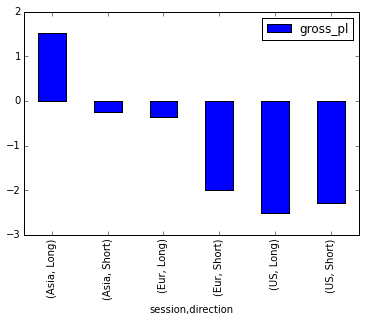

In [6]:
#PL by session long/short
df['hour'] = pd.DatetimeIndex(df['open_date']).hour
def create_session_range(hour):
    if 3 <= hour < 8:
        return "Eur"
    elif 8 <= hour < 17:
        return "US"
    else:
        return "Asia"
    
df["session"] = df["hour"].map(create_session_range)
pivoted_df = pd.pivot_table(df, index=["session", "direction"], values=["gross_pl"])
pivoted_df.plot(kind="bar")

In [7]:
#PL by session long/short in color - NOT CURRENTLY USING
from itertools import cycle, islice
df['hour'] = pd.DatetimeIndex(df['open_date']).hour
def create_session_range(hour):
    if 3 <= hour < 8:
        return "Eur"
    elif 8 <= hour < 17:
        return "US"
    else:
        return "Asia"
    
df["session"] = df["hour"].map(create_session_range)
pivoted_df = pd.pivot_table(df, index=["session", "direction"], values=["gross_pl"])
pivoted_df#.plot(kind="bar", color=list(islice(cycle(['b', 'b', 'g', 'g', 'r', 'r']), None, len(pivoted_df))))

gross_pl
session direction          
Asia    Long       1.518627
        Short     -0.243924
Eur     Long      -0.353269
        Short     -1.987778
US      Long      -2.502500
        Short     -2.291089

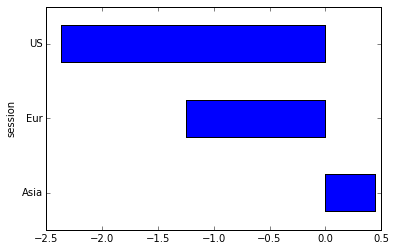

In [8]:
#PL by session
df['hour'] = pd.DatetimeIndex(df['open_date']).hour
def create_session_range(hour):
    if 3 <= hour < 8:
        return "Eur"
    elif 8 <= hour < 17:
        return "US"
    else:
        return "Asia"
    
df["session"] = df["hour"].map(create_session_range)
df.head()
ave_pl_by_session = df.groupby(df['session']).gross_pl.mean().plot(kind="barh")


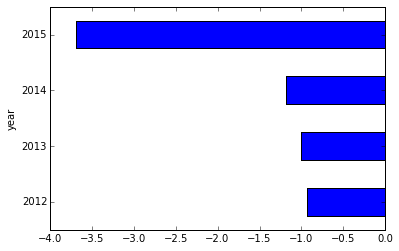

In [9]:
#PL by Year
df['year'] = pd.DatetimeIndex(df['open_date']).year
ave_pl_by_yr = df.groupby(df['year']).gross_pl.mean().plot(kind="barh")

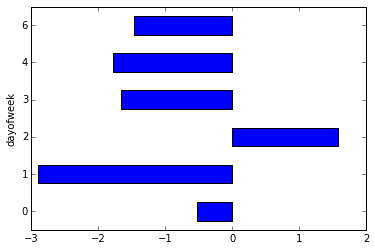

In [10]:
#PL by Weekday
#df['day'] = pd.DatetimeIndex(df['open_date']).day
df['dayofweek'] = pd.DatetimeIndex(df['open_date']).dayofweek
ave_pl_by_wkday = df.groupby(df['dayofweek']).gross_pl.mean().plot(kind="barh")

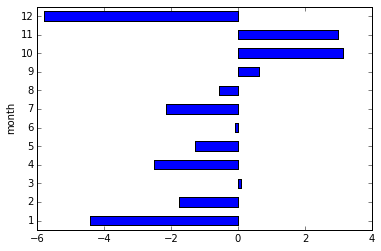

In [11]:
#PL by Month
df['month'] = pd.DatetimeIndex(df['open_date']).month
ave_pl_by_month = df.groupby(df['month']).gross_pl.mean().plot(kind="barh")

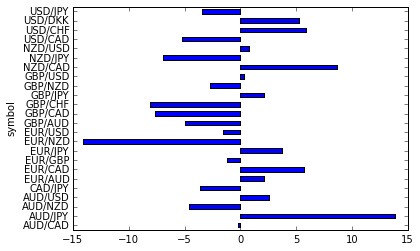

In [12]:
#PL by Pair
ave_pl_by_symbol = df.groupby(['symbol']).gross_pl.mean().plot(kind="barh")

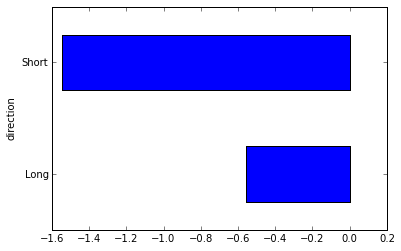

In [13]:
#PL by Direction
ave_pl_by_direction = df.groupby(['direction']).gross_pl.mean().plot(kind="barh")